In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


# Download the CIFAR-10 dataset



In [2]:
#download
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2021-08-09 12:07:28--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  15.9MB/s    in 11s     

2021-08-09 12:07:40 (14.5 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [8]:
#unzip -f file, -x extract
!tar -xf '/content/cifar-10-python.tar.gz'

**data** -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

**labels** -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

The dataset contains another file, called **batches.meta**. It too contains a Python dictionary object. It has the following entries:
label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.

In [44]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [94]:
list_of_class_names = ["airplane", "automobile", "bird", "cat", "deer",	
                       "dog", "frog", "horse", "ship","truck"]

dict_keys(['batch_label', 'labels', 'data', 'filenames'])


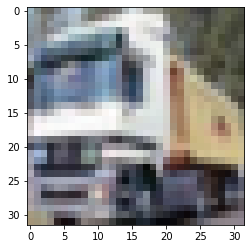

In [63]:
example = unpickle('/content/cifar-10-batches-py/data_batch_1')
print(example.keys())
plt.imshow(example['data'][1].reshape([3, 32, 32]).transpose(1,2,0).astype("uint8"))

In [81]:
first = unpickle('/content/cifar-10-batches-py/data_batch_1')
X_train = np.array(first["data"])
y_train = np.array(first["labels"])

#num of batches
for i in range(2,6):
    batch = unpickle('/content/cifar-10-batches-py/data_batch_{}'.format(i))
    X_train = np.concatenate([X_train, np.array(batch["data"])])
    y_train = np.concatenate([y_train, np.array(batch["labels"])])

In [115]:
test = unpickle('/content/cifar-10-batches-py/test_batch')

X_test = np.array(test["data"])
y_test = np.array(test["labels"])

In [83]:
print('Shape of Train Data', X_train.shape)
print('Shape of Train Labels', y_train.shape)

Shape of Train Data (50000, 3072)
Shape of Train Labels (50000,)


Text(0.5, 1.0, 'bird')

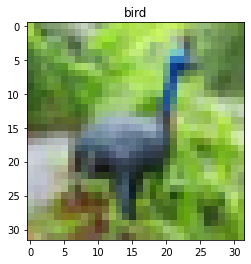

In [99]:
plt.imshow(np.transpose(X_train[6].reshape([3,32,32]), (1,2,0)))
plt.title(list_of_class_names[y_train[6]])

# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rf = RandomForestClassifier(n_estimators = 100)

In [100]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Evaluate model

In [106]:
from sklearn import metrics

In [116]:
y_train_pred = rf.predict(X_train)

accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
balances_accuracy_train = metrics.balanced_accuracy_score(y_train, y_train_pred) # for imbalances classes
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
precision_train = metrics.precision_score(y_train, y_train_pred, average = 'macro') # can do macro bcs classes are balanced
recall_train = metrics.recall_score(y_train, y_train_pred, average= 'macro')
f1_score = metrics.f1_score(y_train, y_train_pred, average= 'macro')

print('Train Accuracy', accuracy_train)
print('Train Balanced Accuracy', balances_accuracy_train)
print('Train Precision', precision_train)
print('Train Recall', recall_train)
print('Train F1 Score', f1_score)


Train Accuracy 1.0
Train Balanced Accuracy 1.0
Train Precision 1.0
Train Recall 1.0
Train F1 Score 1.0


In [117]:
y_test_pred = rf.predict(X_test)

accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
balances_accuracy_test = metrics.balanced_accuracy_score(y_test, y_test_pred) # for imbalances classes
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred)
precision_test = metrics.precision_score(y_test, y_test_pred, average = 'macro') # can do macro bcs classes are balanced
recall_test = metrics.recall_score(y_test, y_test_pred, average= 'macro')
f1_score_test = metrics.f1_score(y_test, y_test_pred, average= 'macro')

print('Test Accuracy', accuracy_test)
print('Test Balanced Accuracy', balances_accuracy_test)
print('Test Precision', precision_test)
print('Test Recall', recall_test)
print('Test F1 Score', f1_score_test)


Test Accuracy 0.4683
Test Balanced Accuracy 0.4683
Test Precision 0.46306483706083235
Test Recall 0.4683
Test F1 Score 0.46422208298140555


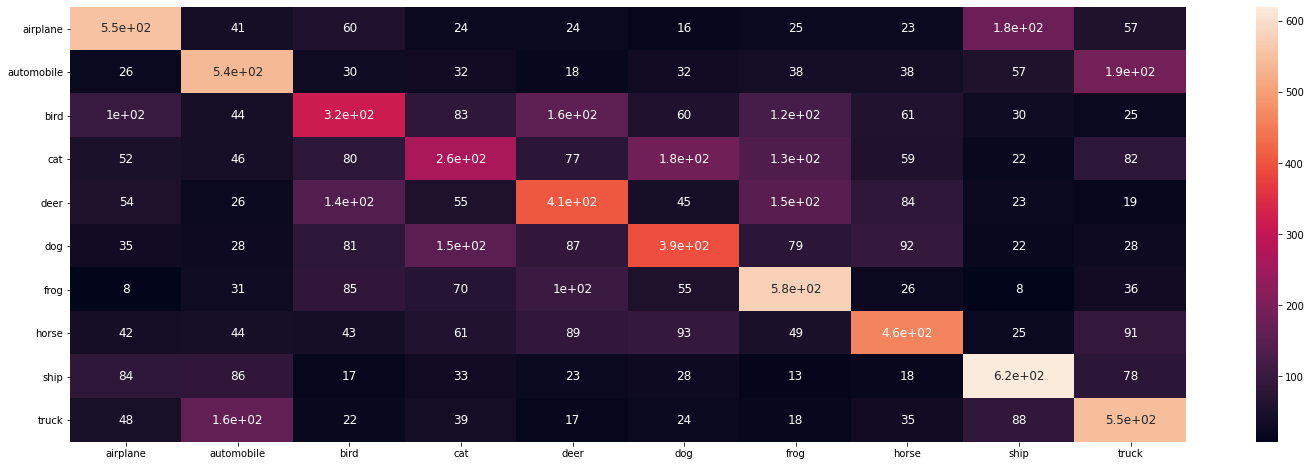

In [134]:
import seaborn as sn

plt.figure(figsize = (25,8))
df_cm = pd.DataFrame(confusion_matrix,list_of_class_names,list_of_class_names)

sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})
plt.show()